# Capstone Project: Pratik Birari #

# Topic : Boston crime incident Reports #

#### Data Extraction

Link of data : https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/792031bf-b9bb-467c-b118-fe795befdf00

The dataset is publicly available and there is no code to download the dataset.
This data is about Crime reports in Boston in 2015. There are total 16 attributes and 53597 observations in the data.

Business Question: 
1.Which is highest crime location in Boston?
2.Which day is most unsecure day i.e. most crime happened?
3.On which day and at what period crime happens most?

In [58]:
#Import all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

   

In [274]:
#Import the data
df= pd.read_csv("https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/792031bf-b9bb-467c-b118-fe795befdf00/download/crime-incident-reports-2015.csv")

#View data
df.head() 

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,280,NaN,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,NaN,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,172,NaN,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,525,NaN,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,NaN,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [34]:
#Total Number of rows and columns
df.shape

(53597, 17)

From above output we can see total number of rows and columns

In [35]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [36]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

## Check the meaning of all attributes. 


Description of all columns is available in seperate excel file on the website only. 

In [ ]:
#Incident Number :               This is unique code to maintain the record 
#Offense Code :                  Code of description
#offense Code Group :            What kind of Crime
#Offense description :           Desciption of crime
#District :                      In which district crime happened
#Reporting area:                 RA number associated with the where the crime was reported from
#Shotting :                      Indicated a shooting took place

##Rest all attributes are self explonatory

## Data CleanUp

In [37]:
#Check the null values
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 129
REPORTING_AREA             0
SHOOTING               53346
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   2
STREET                  1272
Lat                     2128
Long                    2128
Location                   0
dtype: int64

From above observation we found that, "shooting" column has a lot of null values. We will have to replace these null values with any "word" to fill that missing values

In [38]:
#Check how many columns has values
Shootings = df.groupby(["SHOOTING"])
Shootings["SHOOTING"].value_counts()

SHOOTING  SHOOTING
Y         Y           251
Name: SHOOTING, dtype: int64

In [ ]:
#These 251 records of column Shooting is filled with "Y" menas yes and Null values. Hence, we will fill Null values with "N", it indicates there are 
#no shooting happened in the respective place 
#We will replace missing values with "N" 

In [39]:
#Filled missing vlues with "N"
df['SHOOTING'] = df.SHOOTING.fillna('N')

In [40]:
# To proceed with the visualization we dont need need Lat, Long, and Location columns. we will drop them.
df.drop(columns=['Lat','Long','Location'],inplace=True)

In [41]:
#Check Column Names
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET'],
      dtype='object')

In [42]:
#Descriptive statistics of Numeric attributes
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR
count,53597.000000,53597.0,53597.000000,53597.000000
mean,2189.121033,2015.0,9.193089,13.021326
std,1207.314637,0.0,1.880660,6.370420
min,111.000000,2015.0,6.000000,0.000000
25%,802.000000,2015.0,8.000000,9.000000
50%,2647.000000,2015.0,9.000000,14.000000
75%,3125.000000,2015.0,11.000000,18.000000
max,3831.000000,2015.0,12.000000,23.000000


In [284]:
#In this project there are no columsn availble to find min, max, std dev. However,I know the codes to perform it.

df.median()  ##Check the median of dataset


OFFENSE_CODE    2647.000000
YEAR            2015.000000
MONTH              9.000000
HOUR              14.000000
Lat               42.326968
Long             -71.077321
dtype: float64

In [285]:
#Check the mode of dataset
df.mode()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I152071596,1402,Motor Vehicle Accident Response,VANDALISM,B2,,Y,2015-07-01 00:00:00,2015,9,Friday,17,Part Three,WASHINGTON ST,42.328663,-71.085634,"(0.00000000, 0.00000000)"


In [286]:
#Check the min of month
min(df['MONTH'])

6

In [287]:
max(df['MONTH'])

12

In [48]:
# Check column offense_code_group
list(df['OFFENSE_CODE_GROUP'].unique())

['Other',
 'Confidence Games',
 'Fraud',
 'Harassment',
 'Property Lost',
 'Criminal Harassment',
 'Larceny',
 'Auto Theft Recovery',
 'Larceny From Motor Vehicle',
 'Investigate Person',
 'Police Service Incidents',
 'Warrant Arrests',
 'Auto Theft',
 'Restraining Order Violations',
 'Property Found',
 'Robbery',
 'Firearm Violations',
 'Medical Assistance',
 'Simple Assault',
 'Missing Person Located',
 'Missing Person Reported',
 'Embezzlement',
 'Motor Vehicle Accident Response',
 'Residential Burglary',
 'Counterfeiting',
 'Prisoner Related Incidents',
 'Vandalism',
 'Investigate Property',
 'License Plate Related Incidents',
 'Aggravated Assault',
 'Offenses Against Child / Family',
 'Firearm Discovery',
 'Verbal Disputes',
 'Search Warrants',
 'Violations',
 'Landlord/Tenant Disputes',
 'Commercial Burglary',
 'Evading Fare',
 'Towed',
 'Other Burglary',
 'License Violation',
 'Drug Violation',
 'Fire Related Reports',
 'Disorderly Conduct',
 'Operating Under the Influence',
 'B

# Data Visualization #

In [56]:
#Import the required library

import plotly.graph_objects as go
!pip install wordcloud  ## Install the package
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


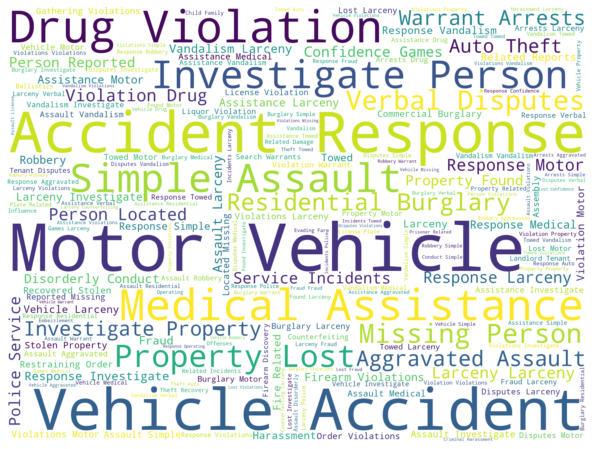

In [59]:
#Graph1: It is word cloud graph which shous the different "offeces" in fancy way

text = ' '.join(str(v) for v in df.OFFENSE_CODE_GROUP)
#" ".join(review for review in df.OFFENSE_CODE_GROUP)
genres_cloud = WordCloud(width=2000, height=1500, background_color="white").generate(text)
plt.figure(figsize=(15,8))

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Count of crime')

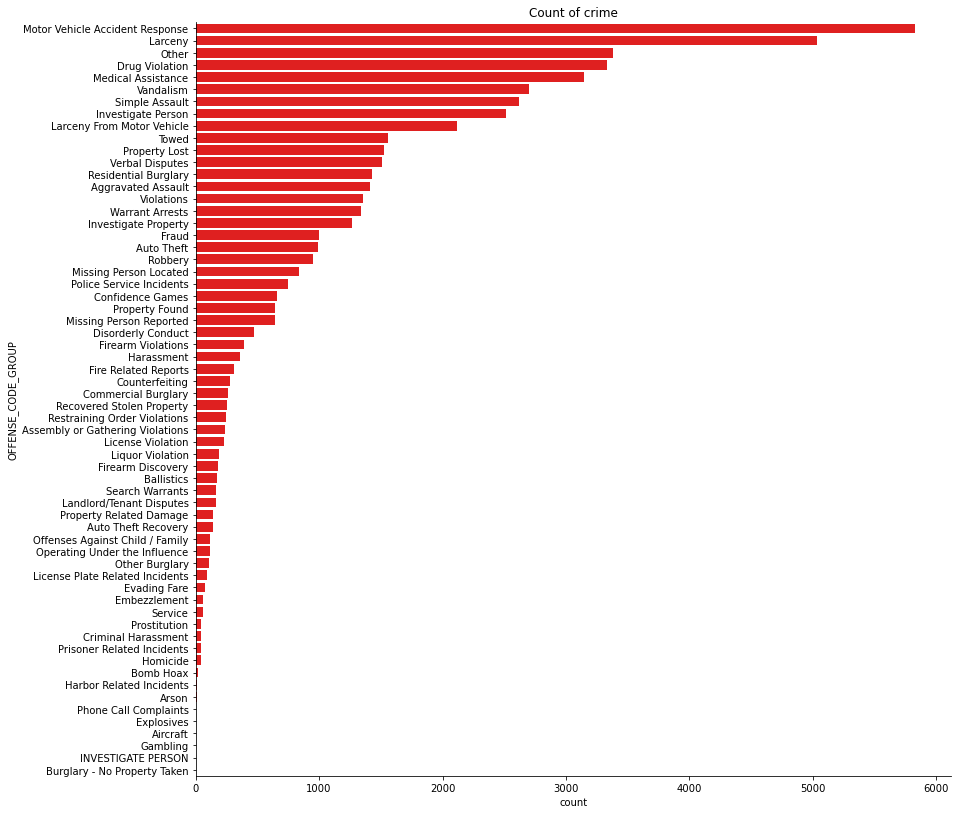

In [161]:
#Graph 2: Count of Crime
chart = sn.catplot(y='OFFENSE_CODE_GROUP',kind='count',height=11,
aspect = 1.2,
color = "Red", order=df.OFFENSE_CODE_GROUP.value_counts().index,
margin_titles = "TRUE",
data= df)
plt.title('Count of crime')



Above graph shows "count of crime", from above graph we can conclude that "Motor vehicle accident" response is the highest amongst all types of criem whcih counts almost 5800 followed by "Larceny (The theft of personal property)" whcih is 5100. Lowest is Bomb Hoax counts less than 20.

C:\Users\Sidd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


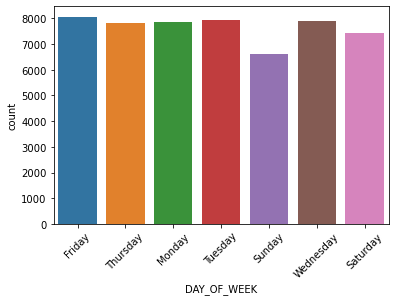

In [157]:
#Graph 3:Counts of crime in a day of a week 
data = sn.countplot(df['DAY_OF_WEEK'])
data.set_xticklabels(data.get_xticklabels(), rotation= 45);


Above graphs show that Friday is the one on which crime happened most. This visaulization will definately help Police department to have more patrolling on the above mentioned days. It observed that there is less crime recorded on Sunday and Saturday.

Text(0.5, 1.0, 'Count of crime in different District')

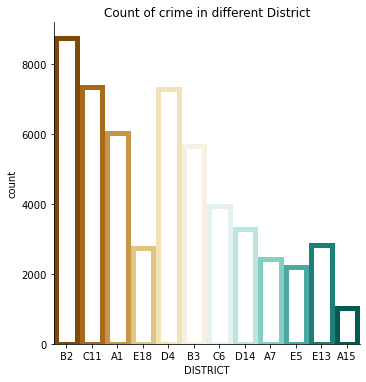

In [158]:
#Graph 4: Count of Crime in different District
sn.catplot(x='DISTRICT',
          data = df,
          kind = 'count',
          color="salmon", 
          facecolor=(0, 0, 0, 0),
          linewidth=5,
          edgecolor=sn.color_palette("BrBG", 12)
          )
plt.title('Count of crime in different District')

Above graph shows, area B2 is highly crimed district amongst the all. Boston police should increae their security at this place. On the other hand, A5 is comparitively low crime area. 

[Text(0.5, 1.0, 'Shooting on Day of week')]

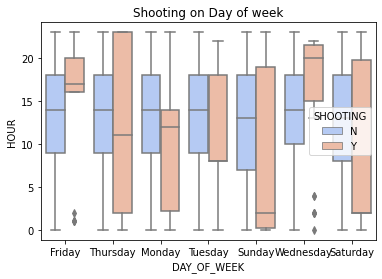

In [155]:
#Graph 5: Boxplot
sn.boxplot(x="DAY_OF_WEEK",y="HOUR",hue="SHOOTING",data=df, palette="coolwarm").set(title='Shooting on Day of week')

Above graph shows, On which day and during what time shooting is mostly happened. Blue Box plot shows "Shooting happened" and "Red Box" suggests "Not happened". Most of the shooting happened in between 10 to 18. Although there are outliers but most occurances is in range "10-18" hours 

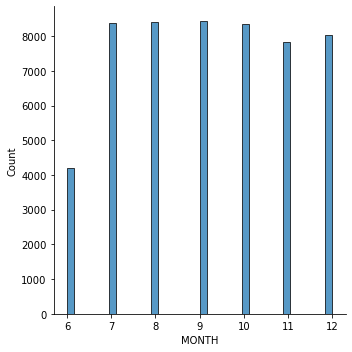

In [162]:
#Check the distribution plot of a "Month" variable
sn.displot(df['MONTH'])

<AxesSubplot:>

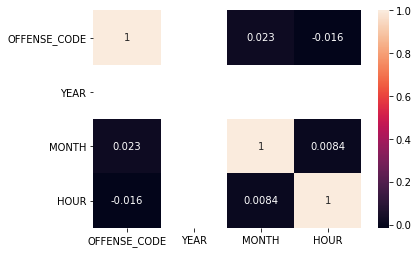

In [166]:
#Checkimng correlation plot since our data has less number of numeric values so correlation plot gives a overiview 
#between every attribute
sn.heatmap(df.corr(), annot = True)

There is high collinearity between "Offence_code" and "Hour". Since out of data, has more categorical variables and only 3 numeric attributes , we can go ahead with linear regression or decision tree.

# Predictive Analysis #

### Decision Tree

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [167]:
#To go ahead with decision Tree, we first check the names of columns to write our code smoothly
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET'],
      dtype='object')

To create a decision tree, first we go with prediction and evaluation. For that we created seperate data dependant and indepandant data. 

In [270]:
#created data "X"; considering further requirements of Split data into train test data
x= df[["YEAR"]]

In [271]:
#This is our target variable. Is has only two values, "YES" and "NO"
y= df['SHOOTING']

We are splitting the data between Train and test data. SKlearn function contains "model_selection" function from which we selected "train_test_split.

In [272]:
from sklearn.model_selection import train_test_split

We divided our data 80 % train - 20 % percent test data. We will gonna predict out model based on that. 

In [259]:
#Divide the data into train and test data set
X_train, X_Test, y_Train, y_Test, = train_test_split(x,y,test_size=0.2)

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [264]:
dtree= DecisionTreeClassifier()

In [265]:
dtree.fit(X_train,y_Train)

DecisionTreeClassifier()

In [273]:
predictions= dtree.predict(X_Test)

We have imported, classification report and "confusion Matrix" from matrics library.

In [268]:
from sklearn.metrics import classification_report, confusion_matrix

We created confusion matrix. Confusion Matrix is a performance measurement for machine learning classification.

In [269]:
print(confusion_matrix(y_Test, predictions))
print('\n')
print(classification_report(y_Test,predictions))

[[10666     0]
 [   54     0]]


              precision    recall  f1-score   support

           N       0.99      1.00      1.00     10666
           Y       0.00      0.00      0.00        54

    accuracy                           0.99     10720
   macro avg       0.50      0.50      0.50     10720
weighted avg       0.99      0.99      0.99     10720



C:\Users\Sidd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We will use 100 of trees to get the desired output

In [275]:
#We used Random Classifier for futher predictions
from sklearn.ensemble import RandomForestClassifier

In [277]:
# We used 100 estimators to find out our results and results of confusion matrix 
rfc = RandomForestClassifier(n_estimators=100)

In [278]:
#We train the the dataset
rfc.fit(X_train, y_Train)

RandomForestClassifier(n_estimators=500)

In [280]:
rfc_pred = rfc.predict(X_Test)

In [281]:
print(confusion_matrix(y_Test, rfc_pred))
print('\n')
print(classification_report(y_Test, rfc_pred))

[[10666     0]
 [   54     0]]


              precision    recall  f1-score   support

           N       0.99      1.00      1.00     10666
           Y       0.00      0.00      0.00        54

    accuracy                           0.99     10720
   macro avg       0.50      0.50      0.50     10720
weighted avg       0.99      0.99      0.99     10720



C:\Users\Sidd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From about output we got the results of Confusion matrix. 
Row first suggests TP,FP   where T:True ; F: False ; P:positive; N:Negative
Row Two Suggests   FN TN

Precision: It shows from all the classes we have predicted as positive, how many are actually positive. And finally accuracy is, how many we predicted correctly from all the classes we have. 

Conclusion: Our model gives 99% accuracy and high precision, it means that this variables can be used to determine the Crime trend in the Boston city. However, we receive 0 false Positve and 0 false negative, it suggests that there is need to change or modify the model or variables. 
From data visualization we can conclude that, "Motor vehicle accident" is the highest category of crime we have recorded.
Friday is the most vulnerable day in terms of crime
B2 district is records the highest crime in Boston
10am to 6 pm (10-18)hours of a day is the period when most crime happened. 